<h1 align=center> Car Price Prediction </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor

In [2]:
data = pd.read_csv('./CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
data.drop(columns=['car_ID'],inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [6]:
palette = itertools.cycle(sns.color_palette())

In [7]:
le = LabelEncoder()

In [8]:
for i in data.columns:
    if data[i].dtypes =='object':
        data[i]=le.fit_transform(data[i])

### Univariate analysis

In [9]:
 cols=['wheelbase','carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']

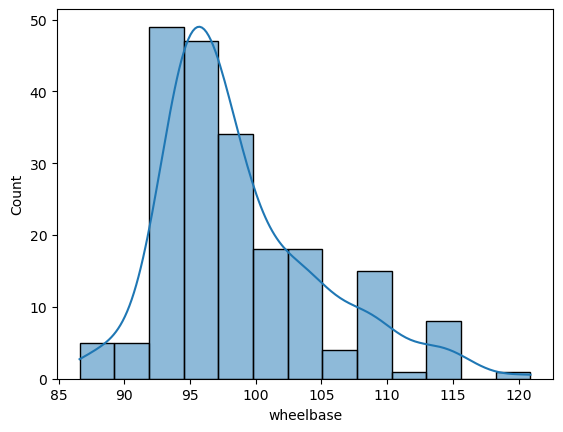

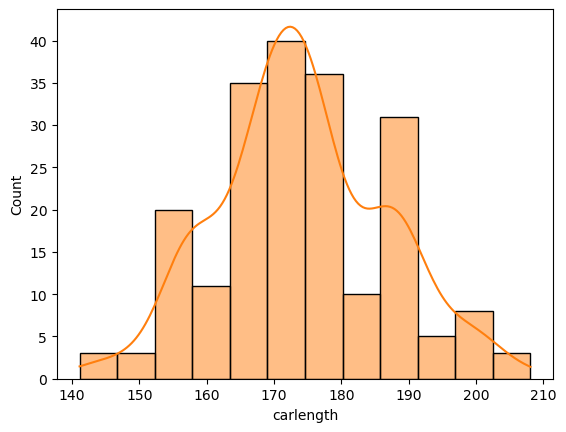

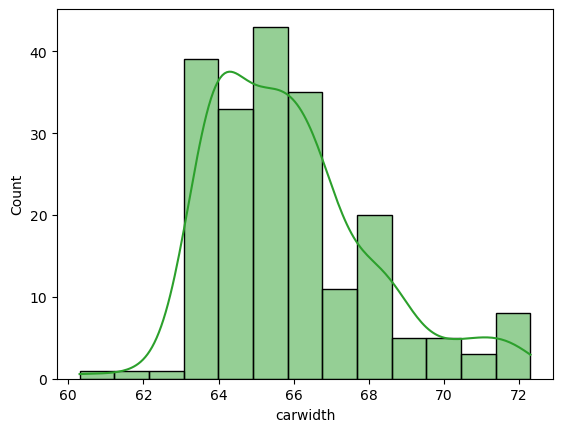

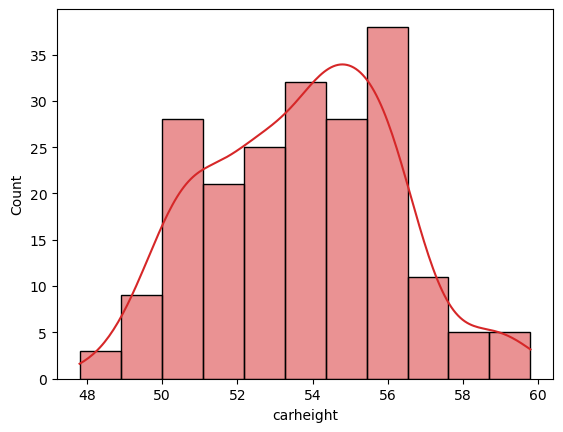

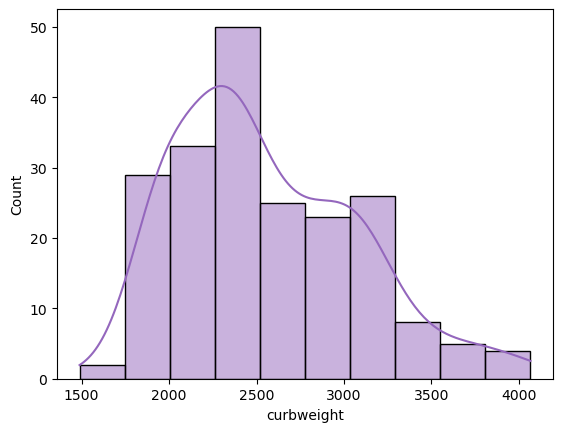

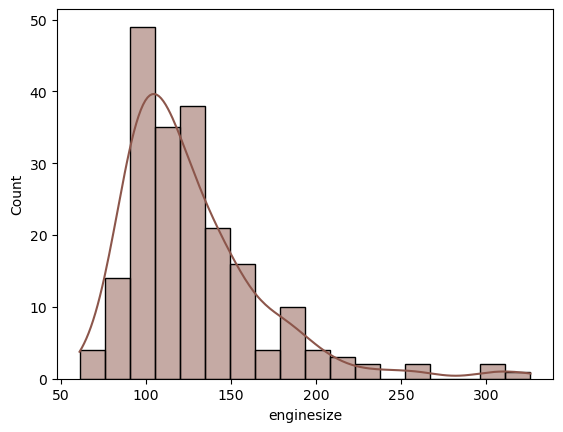

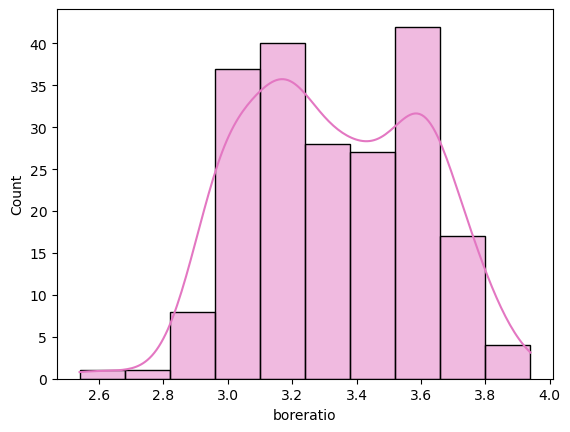

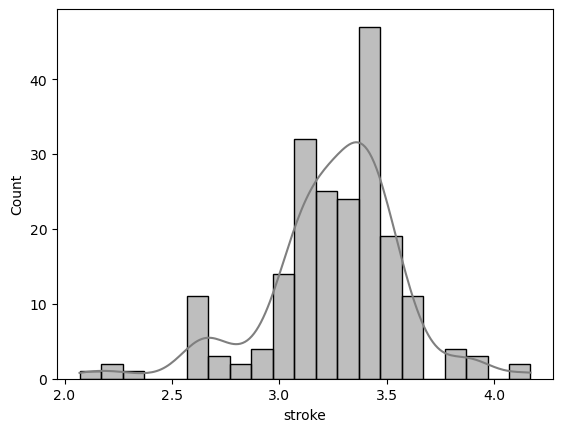

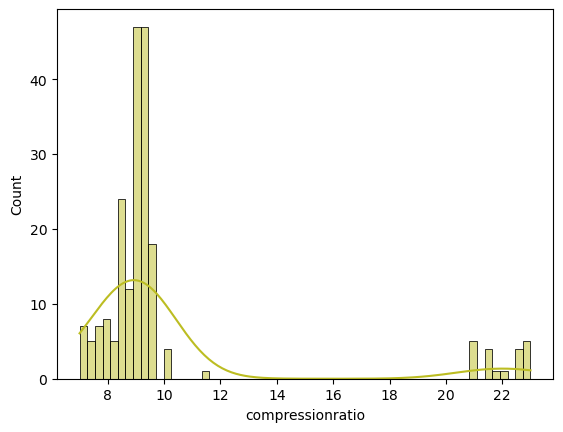

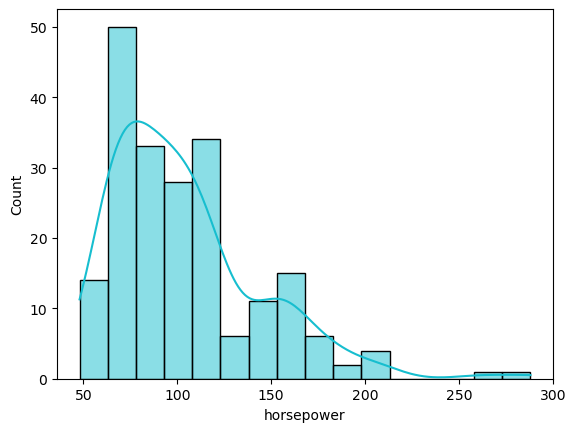

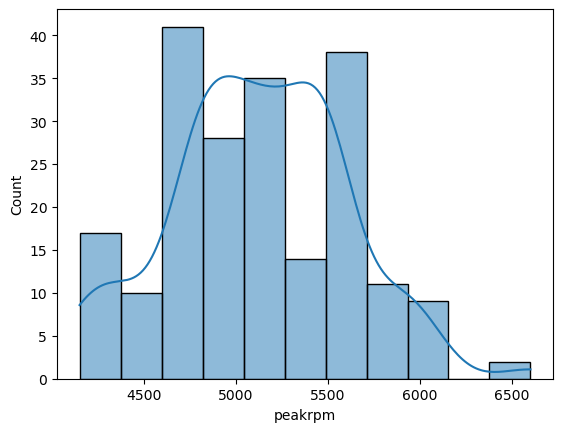

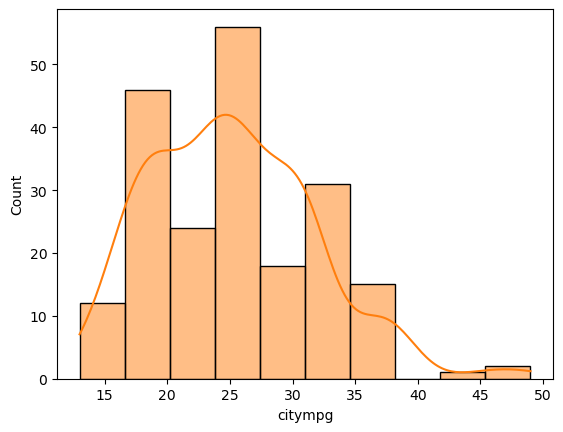

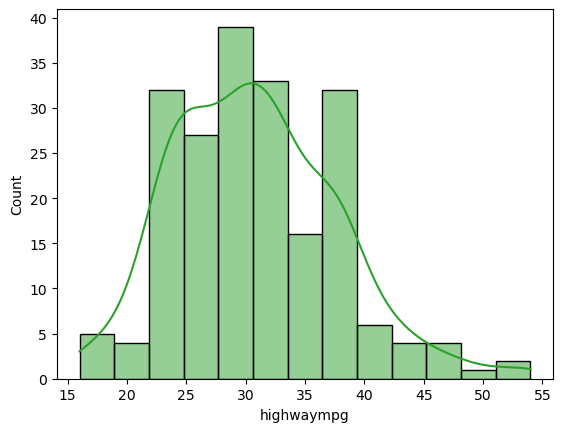

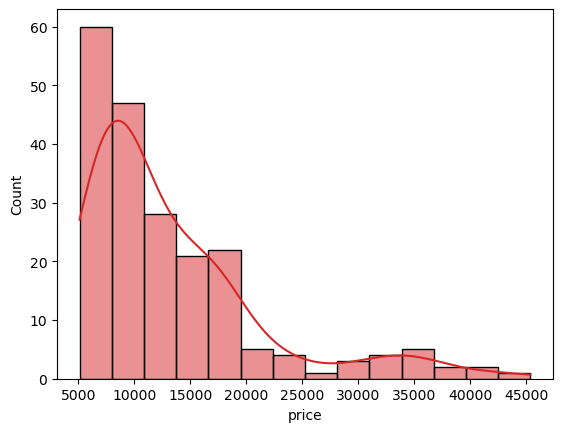

In [10]:
for i in cols:
    sns.histplot(x=data[i],kde=True,color=next(palette))
    plt.show()

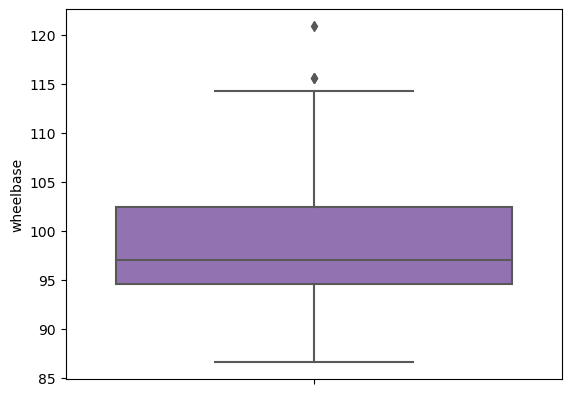

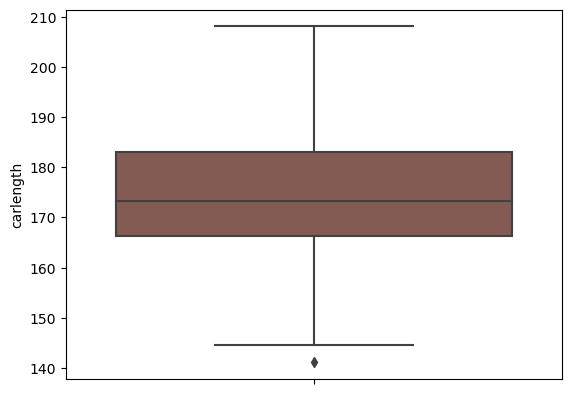

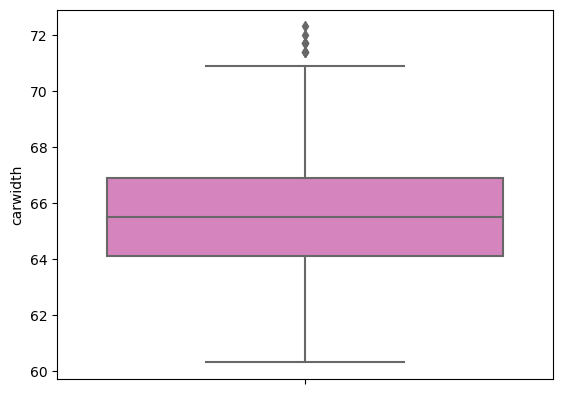

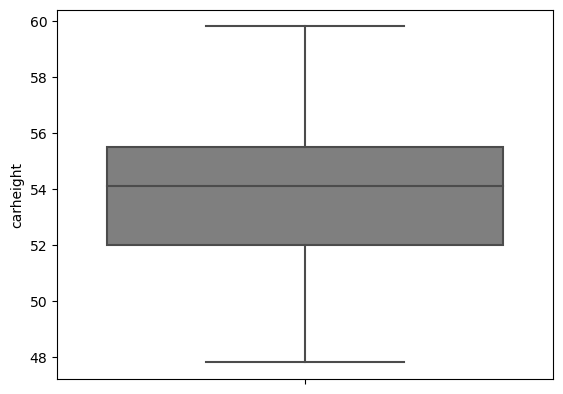

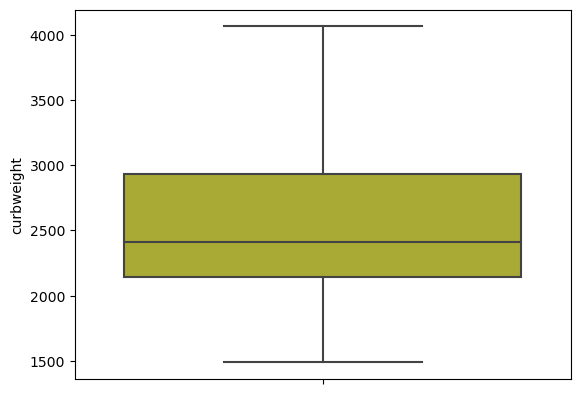

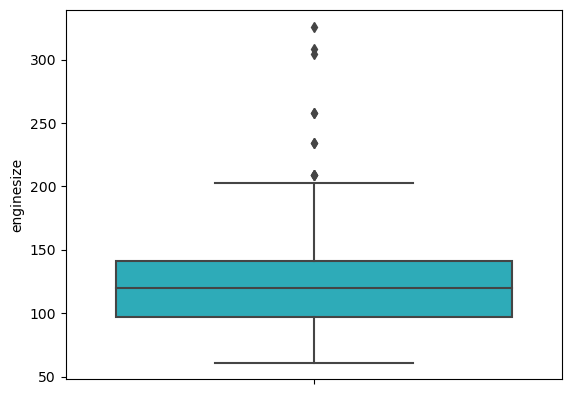

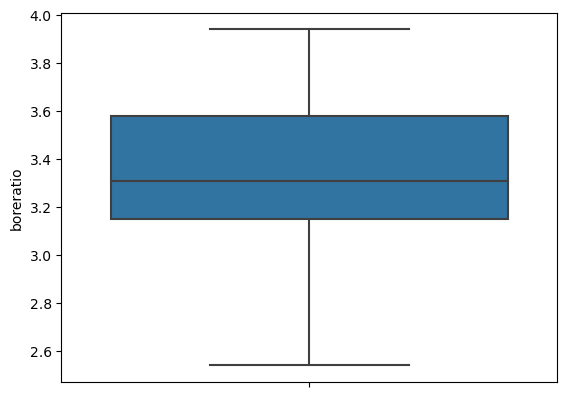

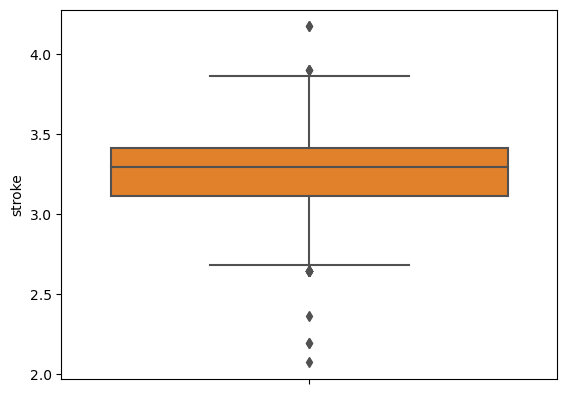

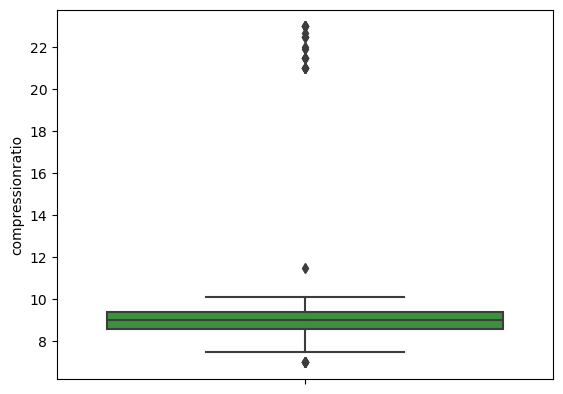

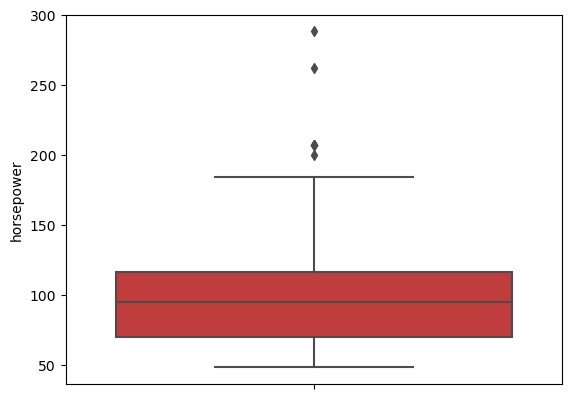

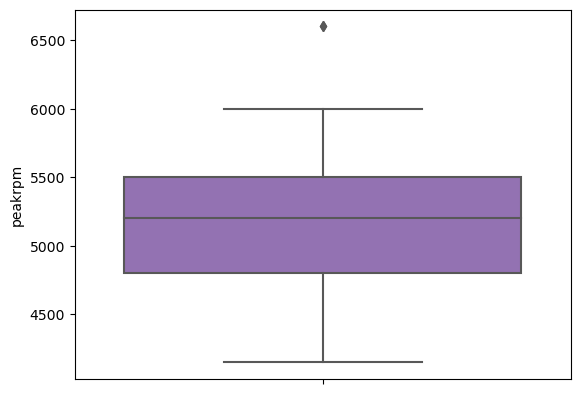

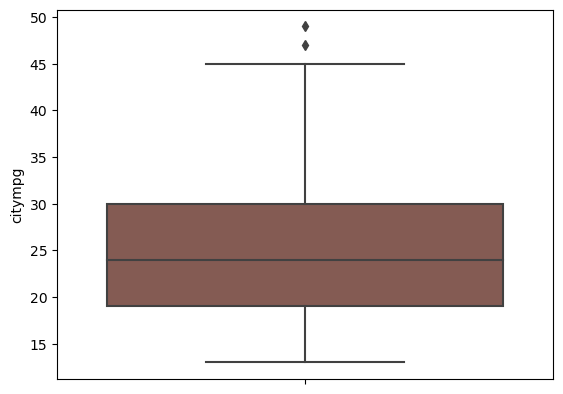

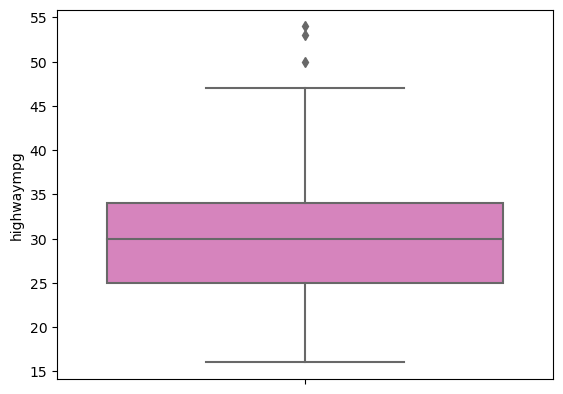

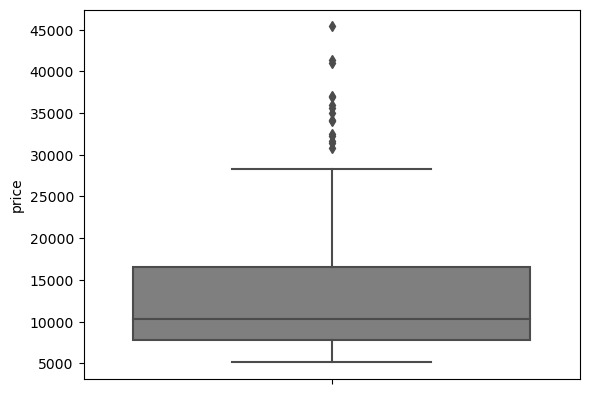

In [11]:
for i in cols:
    sns.boxplot(y=data[i],color=next(palette))
    plt.show()

In [12]:
data.isnull().mean()*100

symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

### Outlier Treatment

In [17]:
def outlier_limit(col):
    Q3,Q1= np.nanpercentile(col,[75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [18]:
UL,LL = outlier_limit(data.price)
data['price'] = np.where((data.price>UL)|(data.price<LL),np.nan,data.price)

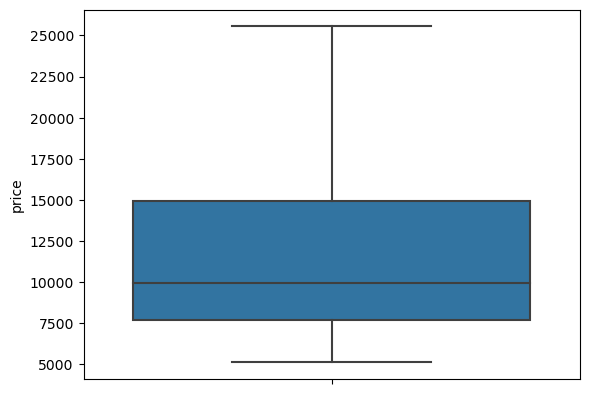

In [19]:
sns.boxplot(data=data,y=data.price)
plt.show()

In [20]:
data.dropna(inplace=True)

In [21]:
data_corr = (data.corr()[['price']]>0.7).reset_index()
data_corr

,index,price
0,symboling,False
1,CarName,False
2,fueltype,False
3,aspiration,False
4,doornumber,False
5,carbody,False
6,drivewheel,False
7,enginelocation,False
8,wheelbase,False
9,carlength,True


In [22]:
data_corr[data_corr.price==True]

,index,price
9,carlength,True
10,carwidth,True
12,curbweight,True
15,enginesize,True
20,horsepower,True
24,price,True


In [23]:
x=data[['carlength','carwidth','curbweight','enginesize','horsepower']].values

In [24]:
y = data[['price']].values

In [25]:
rs = RobustScaler()

In [26]:
x = rs.fit_transform(x)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

### Model building

In [28]:
models = {"LinearRegression":LinearRegression(),
          "Ridge":Ridge(),
          "Lasso":Lasso(),
          "RandomForestRegressor":RandomForestRegressor(),
          "AdaBoostRegressor":AdaBoostRegressor(),
          "GradientBoostingRegressor":GradientBoostingRegressor(),
          "DecisionTreeRegressor":DecisionTreeRegressor(),
          "LinearSVR":LinearSVR()
    
}

In [30]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("Cross validation model:{}".format(name))
    rmse = np.sqrt(-scores)
    rmse_avg = np.mean(rmse)
    print("Avg rmse",rmse_avg)
    print('*'*100)

Cross validation model:LinearRegression
Avg rmse 2358.793537221998
****************************************************************************************************
Cross validation model:Ridge
Avg rmse 2341.9846042609465
****************************************************************************************************
Cross validation model:Lasso
Avg rmse 2356.7816374745826
****************************************************************************************************
Cross validation model:RandomForestRegressor
Avg rmse 2377.2273866692826
****************************************************************************************************
Cross validation model:AdaBoostRegressor
Avg rmse 2361.766516171995
****************************************************************************************************
Cross validation model:GradientBoostingRegressor
Avg rmse 2367.0705500856757
************************************************************************************************

In [31]:
Model = Ridge()

In [32]:
R = Model.fit(x_train,y_train)

In [33]:
y_pred = R.predict(x_test)

In [34]:
score = r2_score(y_test,y_pred)
print("Score:{}".format(score))

Score:0.7182590758970465


In [35]:
R.score(x_test,y_test)

0.7182590758970465

In [36]:
R.score(x_train,y_train)

0.7674810286198789

In [37]:
Output = pd.DataFrame(zip(y_test,y_pred),columns=["Actual","Prediction"],dtype=float)
Output.head()

,Actual,Prediction
0,16845.0,16801.217825
1,15998.0,18419.447639
2,5572.0,6052.247711
3,5151.0,728.772301
4,9959.0,11771.275403


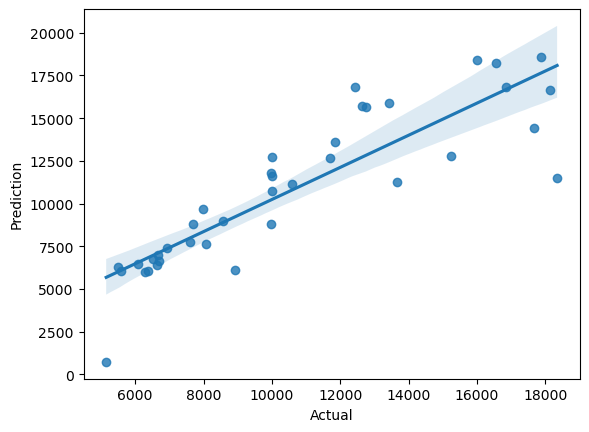

In [38]:
sns.regplot(data=Output,x="Actual",y="Prediction")
plt.show()